# Adverts exercise
The goal is to try to figure out what category is most likely to buy something from an advert on the internet

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

df = pd.read_csv('advertising.csv')

## 1: Explore the data

In [11]:
df.shape[0]

1000

In [8]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1205 entries, 1 to Zimbabwe
dtypes: uint8(1205)
memory usage: 1.1 MB


In [68]:
df.describe()

,1,Adamside,Adamsstad,Alanview,Alexanderfurt,Alexanderview,Alexandrafort,Alexisland,Aliciatown,Alvaradoport,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.481000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.005000,0.002000,0.006000,0.007000,0.003000,0.004000,0.007000,0.003000,0.004000,0.006000
std,0.499889,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,...,0.070569,0.044699,0.077266,0.083414,0.054717,0.063151,0.083414,0.054717,0.063151,0.077266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


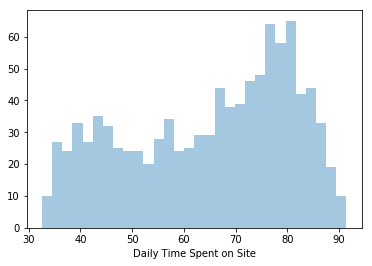

In [17]:
sns.distplot(df['Daily Time Spent on Site'].dropna(), kde=False, bins=30)

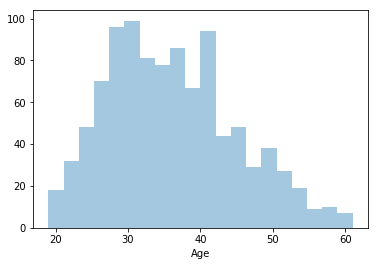

In [71]:
sns.distplot(df['Age'].dropna(), kde=False, bins=20)

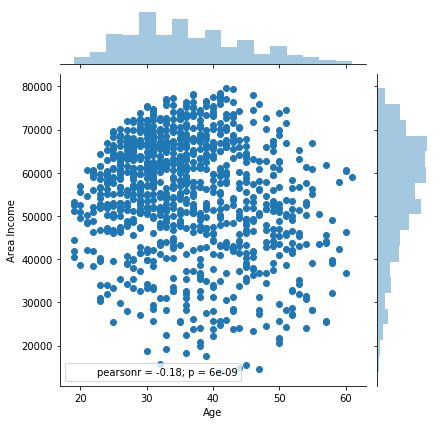

In [72]:
sns.jointplot(x='Age', y='Area Income', data=df)

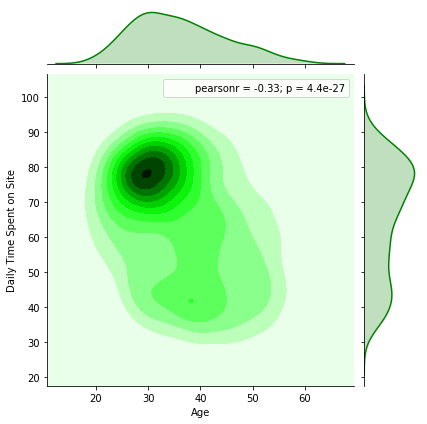

In [75]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde', color='green')

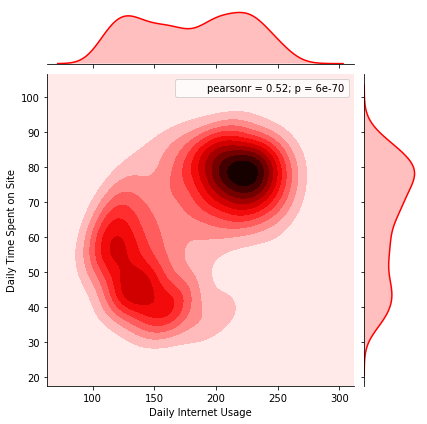

In [79]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, kind='kde', color='red')

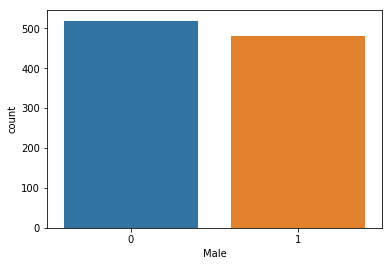

In [21]:
sns.countplot(x='Male', data=df)

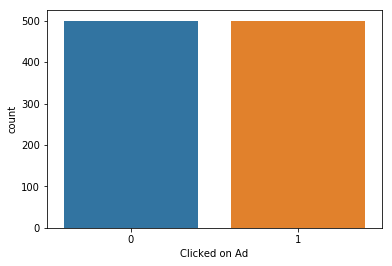

In [23]:
sns.countplot(x='Clicked on Ad', data=df)

## 2: Clean the data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


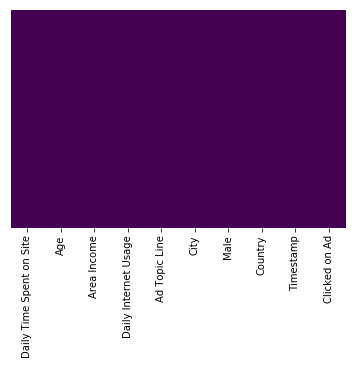

In [28]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

No null values to handle

In [80]:
df.drop(['City', 'Country', 'Ad Topic Line', 'Timestamp'], axis=1, inplace=True)

In [81]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## 3: Train model and make predictions

In [82]:
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
logmodel = LogisticRegression()

In [85]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
predictions = logmodel.predict(X_test)

In [87]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300

